# Understanding Client Profiles and Forecasting Payment Difficulties using Data Science
---


## **Project Overview**
This project aims to analyze and predict the payment difficulties of clients using data from Home Credit Indonesia. The dataset consists of 10 CSV files, but we will focus on two key files: `application_train.csv` and `application_test.csv`.

## **Problem Statement**
The primary objective of this project is to determine the number of clients with payment difficulties and those without payment difficulties. Additionally, we aim to explore various client backgrounds, including gender, number of children, total income, occupation, and more.

## **Project Goals**
The main goals of this project are as follows:

1. Create machine learning models to predict future clients' payment difficulties.
2. Classify clients into two categories: with payment difficulties and without payment difficulties.

## **Methodology**
This project will utilize classification methods to predict the client's payment difficulties. The following steps will be followed:

1. Data Visualization: Perform exploratory data analysis and visualize the dataset.
2. Feature Engineering: Prepare the dataset by transforming and cleaning the data.
3. Model Building: Construct several machine learning models, including logistic regression, decision tree, and random forest.
4. Model Evaluation: Assess the accuracy of the built models using evaluation metrics such as confusion matrix, recall, precision, AUC-ROC score, mean squared error (MSE), and cross-validation.

# EDA (Exploratory Data Analysis)

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

from sklearn.metrics import confusion_matrix
import sklearn.metrics as met
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
import sklearn.feature_selection as fs
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.utils import resample
from google.colab import drive

In [109]:
drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/Colab Notebooks/application_train.csv'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [110]:
df_train = pd.read_csv(path) 
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [112]:
print('data shape:',df_train.shape)
print('='*100)
print('data columns', df_train.columns)

data shape: (307511, 122)
data columns Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [113]:
df_train.DAYS_REGISTRATION.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: DAYS_REGISTRATION
Non-Null Count   Dtype  
--------------   -----  
307511 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [114]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### detecting duplication

In [115]:
print('number of data duplication is:', df_train.duplicated().sum())

number of data duplication is: 0


In [116]:
nan_values = df_train.isna().sum().values
nan_values

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,     12,    278,   1292,      0,      0,      0,      0,
            0,      0,      0,      0,      0, 202929,      0,      0,
            0,      0,      0,      0,  96391,      2,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0, 173378,    660,  60965, 156061, 179943, 150007, 204488,
       214865, 163891, 154828, 153020, 208642, 182590, 210199, 154350,
       213514, 169682, 156061, 179943, 150007, 204488, 214865, 163891,
       154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682,
       156061, 179943, 150007, 204488, 214865, 163891, 154828, 153020,
       208642, 182590, 210199, 154350, 213514, 169682, 210295, 154297,
       148431, 156341, 145755,   1021,   1021,   1021,   1021,      1,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [117]:
nan_values = list(nan_values)
rows_df_train = df_train.shape[0]

threshold = 0.45 * rows_df_train  
count = sum(1 for value in nan_values if value > threshold)

print("Jumlah nilai kolom yang lebih besar dari 45% dari 307511:", count)
print('total threshold:',threshold)
print('='*100)


indices = [index for index, value in enumerate(nan_values) if value > threshold]
print("Indeks dengan nilai lebih besar dari 45% dari 307511:", indices)

Jumlah nilai kolom yang lebih besar dari 45% dari 307511: 49
total threshold: 138379.95
Indeks dengan nilai lebih besar dari 45% dari 307511: [21, 41, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [118]:
column_21 = df_train.columns[21]
column_41 = df_train.columns[41]
column_left = df_train.columns[44:91] 
column_left= list(column_left)
all_remove_column = [column_21 , column_41,]
all_remove_column = all_remove_column + column_left

df_train.drop(df_train[all_remove_column], inplace=True, axis=1)

In [119]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Preprocessing and Feature Engineering

### Object data type Columns

In [120]:
obj = df_train.dtypes
obj_counts = obj[obj == 'object'].count()
obj_columns = obj[obj == 'object'].index.tolist()

print("Jumlah kolom dengan dtype 'object':", obj_counts)
print('='* 50)
print("Kolom dengan dtype 'object':\n", obj_columns)
print('='* 50)
print('tipe data obj_columns', type(obj_columns))

Jumlah kolom dengan dtype 'object': 12
Kolom dengan dtype 'object':
 ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
tipe data obj_columns <class 'list'>


In [121]:
df_train[obj_columns].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [122]:
print('number of isna detection:')
isna_obj = df_train[obj_columns].isna()
isna_obj.sum()

number of isna detection:


NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE               96391
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
dtype: int64

In [123]:
lis_kolom = ['NAME_TYPE_SUITE', 'OCCUPATION_TYPE',]

for i in lis_kolom:
    all_value_counts = df_train[i].value_counts()
    print('Column\'s name:', i)
    print(all_value_counts)
    print('='*60)
    print()
    

Column's name: NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Column's name: OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64



In [124]:
df_train = df_train.dropna(subset=['NAME_TYPE_SUITE'])
print('total number of NaN value in Name Type Suite column:',df_train['NAME_TYPE_SUITE'].isna().sum())

total number of NaN value in Name Type Suite column: 0


In [125]:

list_OCCUPATION_TYPE = ['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers',
                       'High skill tech staff']

df_train['OCCUPATION_TYPE'].fillna(random.choice(list_OCCUPATION_TYPE), inplace=True)

print('Jumlah NaN values pada kolom ini adalah:',df_train['OCCUPATION_TYPE'].isna().sum())
print('='*80)
print(df_train['OCCUPATION_TYPE'].value_counts())

Jumlah NaN values pada kolom ini adalah: 0
Laborers                 150978
Sales staff               31958
Core staff                27427
Managers                  21276
Drivers                   18521
High skill tech staff     11327
Accountants                9769
Medicine staff             8505
Security staff             6695
Cooking staff              5930
Cleaning staff             4641
Private service staff      2637
Low-skill Laborers         2085
Waiters/barmen staff       1340
Secretaries                1301
Realty agents               748
HR staff                    559
IT staff                    522
Name: OCCUPATION_TYPE, dtype: int64


<ipython-input-125-f27a070a2174>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['OCCUPATION_TYPE'].fillna(random.choice(list_OCCUPATION_TYPE), inplace=True)


In [126]:
def objColumns_and_NaN_object():   
    obj = df_train.dtypes
    obj_columns = obj[obj == 'object'].index.tolist()

    print(obj_columns)
    print('='*60)
    print(df_train[obj_columns].isna().sum())

objColumns_and_NaN_object()

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64


In [127]:
objColumns_and_NaN_object()

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64


In [128]:
obj = df_train.dtypes
obj_columns = obj[obj == 'object'].index.tolist()
df_train[obj_columns].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [129]:

for i in obj_columns:
    print('kolom:', i)
    obj_unique = df_train[i].unique()
    print(obj_unique)
    print('='*90)
    

kolom: NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
kolom: CODE_GENDER
['M' 'F' 'XNA']
kolom: FLAG_OWN_CAR
['N' 'Y']
kolom: FLAG_OWN_REALTY
['Y' 'N']
kolom: NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
kolom: NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
kolom: NAME_EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
kolom: NAME_FAMILY_STATUS
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
kolom: NAME_HOUSING_TYPE
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
kolom: OCCUPATION_TYPE
['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech

In [130]:
col = ['CODE_GENDER', 'ORGANIZATION_TYPE']

for i in col:
    val_col = df_train[i].value_counts()
    print(val_col)
    print('='*80)

F      201643
M      104572
XNA         4
Name: CODE_GENDER, dtype: int64
Business Entity Type 3    67686
XNA                       55178
Self-employed             38259
Other                     16623
Medicine                  11145
Business Entity Type 2    10509
Government                10357
School                     8856
Trade: type 7              7798
Kindergarten               6853
Construction               6692
Business Entity Type 1     5963
Transport: type 4          5374
Trade: type 3              3471
Industry: type 9           3345
Industry: type 3           3269
Security                   3229
Housing                    2941
Industry: type 11          2698
Military                   2621
Bank                       2484
Agriculture                2446
Police                     2331
Transport: type 2          2191
Postal                     2152
Security Ministries        1965
Trade: type 2              1887
Restaurant                 1800
Services                   156

In [131]:
col_ORGANIZATION_TYPE = ['Business Entity Type 3','Self-employed','Other', 'Medicine',
                         'Business Entity Type 2','Government','School','Trade: type 7',
                         'Kindergarten', 'Construction','Business Entity Type 1',
                         'Transport: type 4','Trade: type 3', 'Industry: type 9', 'Industry: type 3',
                         'Security', 'Housing','Industry: type 11','Military','Bank']

df_train['ORGANIZATION_TYPE'] = [random.choice(col_ORGANIZATION_TYPE) if x == 'XNA' else x for x in df_train['ORGANIZATION_TYPE']] 


<ipython-input-131-564296bfc905>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['ORGANIZATION_TYPE'] = [random.choice(col_ORGANIZATION_TYPE) if x == 'XNA' else x for x in df_train['ORGANIZATION_TYPE']]


In [132]:
df_train.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'Business Entity Type 1', 'Electricity', 'Medicine',
       'Bank', 'Business Entity Type 2', 'Self-employed',
       'Transport: type 2', 'Construction', 'Housing', 'Kindergarten',
       'Trade: type 7', 'Trade: type 3', 'Industry: type 11', 'Military',
       'Services', 'Security Ministries', 'Transport: type 4',
       'Industry: type 1', 'Industry: type 3', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Police', 'Postal',
       'Transport: type 3', 'Industry: type 4', 'Agriculture',
       'Restaurant', 'Industry: type 9', 'Culture', 'Hotel',
       'Industry: type 7', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'Industry

In [133]:
# Menghapus semua elemen dengan value 'XNA' di kolom 'CODE_GENDER'

df_train = df_train.dropna(subset=['CODE_GENDER'])

df_train = df_train.drop(df_train[df_train['CODE_GENDER'] == 'XNA'].index)
print('total number of NaN value in CODE GENDER column:',df_train['CODE_GENDER'].isna().sum())

total number of NaN value in CODE GENDER column: 0


In [134]:

col = ['CODE_GENDER', 'ORGANIZATION_TYPE']

for i in col:
    val_col = df_train[i].value_counts()
    print(val_col)
    print('='*80)
    

F    201643
M    104572
Name: CODE_GENDER, dtype: int64
Business Entity Type 3    70503
Self-employed             40982
Other                     19390
Medicine                  13950
Business Entity Type 2    13332
Government                13122
School                    11747
Trade: type 7             10441
Kindergarten               9672
Construction               9403
Business Entity Type 1     8694
Transport: type 4          8159
Trade: type 3              6204
Industry: type 9           6050
Industry: type 3           6025
Security                   5910
Housing                    5640
Industry: type 11          5613
Military                   5348
Bank                       5162
Agriculture                2446
Police                     2331
Transport: type 2          2191
Postal                     2152
Security Ministries        1965
Trade: type 2              1887
Restaurant                 1800
Services                   1568
University                 1322
Industry: type 7

In [135]:
objColumns_and_NaN_object()
print()
print('=' *80)
print()
for i in obj_columns:
    print('kolom:', i)
    obj_unique = df_train[i].unique()
    print(obj_unique)
    print('='*90)
    

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64


kolom: NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
kolom: CODE_GENDER
['M' 'F']
kolom: FLAG_OWN_CAR
['N' 'Y']
kolom: FLAG_OWN_REALTY
['Y' 'N']
kolom: NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
kolom: NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner

In [136]:
df_encoded = pd.get_dummies(df_train[obj_columns])
df_encoded = df_encoded.astype('int')
df_train = pd.concat([df_train, df_encoded], axis=1)

df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0


## int data type columns

In [137]:
intg = df_train.dtypes
intg_counts = intg[intg == 'int64'].count()
intg_columns = intg[intg == 'int64'].index.tolist()

print("Jumlah kolom dengan dtype 'int':", intg_counts)
print('='* 50)
print("Kolom dengan dtype 'int':\n", intg_columns)
print('='* 50)
print('tipe data obj_columns', type(intg_columns))

Jumlah kolom dengan dtype 'int': 162
Kolom dengan dtype 'int':
 ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_F', 'CODE_GENDER_M

In [138]:
df_train[intg_columns].isna().sum()

SK_ID_CURR                             0
TARGET                                 0
CNT_CHILDREN                           0
DAYS_BIRTH                             0
DAYS_EMPLOYED                          0
                                      ..
ORGANIZATION_TYPE_Transport: type 1    0
ORGANIZATION_TYPE_Transport: type 2    0
ORGANIZATION_TYPE_Transport: type 3    0
ORGANIZATION_TYPE_Transport: type 4    0
ORGANIZATION_TYPE_University           0
Length: 162, dtype: int64

In [139]:
df_train[intg_columns].head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,100002,1,0,-9461,-637,-2120,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,-16765,-1188,-291,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,-19046,-225,-2531,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [140]:
for i in intg_columns:
    print('kolom:', i)
    int_unique = df_train[i].unique()
    print(int_unique)
    print('='*90)


kolom: SK_ID_CURR
[100002 100003 100004 ... 456253 456254 456255]
kolom: TARGET
[1 0]
kolom: CNT_CHILDREN
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
kolom: DAYS_BIRTH
[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
kolom: DAYS_EMPLOYED
[  -637  -1188   -225 ... -12971 -11084  -8694]
kolom: DAYS_ID_PUBLISH
[-2120  -291 -2531 ... -6194 -5854 -6211]
kolom: FLAG_MOBIL
[1 0]
kolom: FLAG_EMP_PHONE
[1 0]
kolom: FLAG_WORK_PHONE
[0 1]
kolom: FLAG_CONT_MOBILE
[1 0]
kolom: FLAG_PHONE
[1 0]
kolom: FLAG_EMAIL
[0 1]
kolom: REGION_RATING_CLIENT
[2 1 3]
kolom: REGION_RATING_CLIENT_W_CITY
[2 1 3]
kolom: HOUR_APPR_PROCESS_START
[10 11  9 17 16 14  8 15  7 13  6 12 19  3 18 21  4  5 20 22  1  2 23  0]
kolom: REG_REGION_NOT_LIVE_REGION
[0 1]
kolom: REG_REGION_NOT_WORK_REGION
[0 1]
kolom: LIVE_REGION_NOT_WORK_REGION
[0 1]
kolom: REG_CITY_NOT_LIVE_CITY
[0 1]
kolom: REG_CITY_NOT_WORK_CITY
[0 1]
kolom: LIVE_CITY_NOT_WORK_CITY
[0 1]
kolom: FLAG_DOCUMENT_2
[0 1]
kolom: FLAG_DOCUMENT_3
[1 0]
kolom: FLAG_DOCU

## Float data type columns

In [141]:
float64 = df_train.dtypes
float64_counts = float64[float64 == 'float64'].count()
float64_columns = float64[float64== 'float64'].index.tolist()

print("Jumlah kolom dengan dtype 'float':", float64_counts)
print('='* 50)
print("Kolom dengan dtype 'float':\n", float64_columns)
print('='* 50)
print('tipe data obj_columns', type(float64_columns))

Jumlah kolom dengan dtype 'float': 20
Kolom dengan dtype 'float':
 ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
tipe data obj_columns <class 'list'>


In [142]:
nan_counts_float = df_train[float64_columns].isna().sum()
print(nan_counts_float)

AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                   0
REGION_POPULATION_RELATIVE        0
DAYS_REGISTRATION                 0
CNT_FAM_MEMBERS                   0
EXT_SOURCE_2                    659
EXT_SOURCE_3                  60751
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41410
AMT_REQ_CREDIT_BUREAU_DAY     41410
AMT_REQ_CREDIT_BUREAU_WEEK    41410
AMT_REQ_CREDIT_BUREAU_MON     41410
AMT_REQ_CREDIT_BUREAU_QRT     41410
AMT_REQ_CREDIT_BUREAU_YEAR    41410
dtype: int64


In [143]:
nan_counts = df_train[float64_columns].isna().sum()

def float_counts():
    for col, count in nan_counts.items():
        print(f"{col} = {count} NaN")
        
float_counts()

AMT_INCOME_TOTAL = 0 NaN
AMT_CREDIT = 0 NaN
AMT_ANNUITY = 12 NaN
AMT_GOODS_PRICE = 0 NaN
REGION_POPULATION_RELATIVE = 0 NaN
DAYS_REGISTRATION = 0 NaN
CNT_FAM_MEMBERS = 0 NaN
EXT_SOURCE_2 = 659 NaN
EXT_SOURCE_3 = 60751 NaN
OBS_30_CNT_SOCIAL_CIRCLE = 1021 NaN
DEF_30_CNT_SOCIAL_CIRCLE = 1021 NaN
OBS_60_CNT_SOCIAL_CIRCLE = 1021 NaN
DEF_60_CNT_SOCIAL_CIRCLE = 1021 NaN
DAYS_LAST_PHONE_CHANGE = 1 NaN
AMT_REQ_CREDIT_BUREAU_HOUR = 41410 NaN
AMT_REQ_CREDIT_BUREAU_DAY = 41410 NaN
AMT_REQ_CREDIT_BUREAU_WEEK = 41410 NaN
AMT_REQ_CREDIT_BUREAU_MON = 41410 NaN
AMT_REQ_CREDIT_BUREAU_QRT = 41410 NaN
AMT_REQ_CREDIT_BUREAU_YEAR = 41410 NaN


In [144]:
nan_counts = df_train[float64_columns].isna().sum()

lis_float_nan =[]
lis_column_float_nan= []

for col, count in nan_counts.items():
  lis_float_nan.append(count)
  lis_column_float_nan.append(col)

percentage = 0.45
rows_df_train = df_train.shape[0]

threshold = percentage * rows_df_train  
count = sum(1 for value in lis_float_nan if value > threshold)

print("Jumlah nilai kolom yang lebih besar dari 45% dari 307511 sebanyak:", count, ' kolom')
print(f'nilai threshold dari {percentage} adalah = {threshold}')
print('='*100)


indices = [index for index, value in enumerate(lis_float_nan) if value > threshold]
print("Indeks dengan nilai lebih besar dari 45% dari 307511:", indices)


Jumlah nilai kolom yang lebih besar dari 45% dari 307511 sebanyak: 0  kolom
nilai threshold dari 0.45 adalah = 137796.75
Indeks dengan nilai lebih besar dari 45% dari 307511: []


In [145]:
def float_counts():
    for col, count in nan_counts.items():
        print(f"{col} = {count} NaN")
        
float_counts()

AMT_INCOME_TOTAL = 0 NaN
AMT_CREDIT = 0 NaN
AMT_ANNUITY = 12 NaN
AMT_GOODS_PRICE = 0 NaN
REGION_POPULATION_RELATIVE = 0 NaN
DAYS_REGISTRATION = 0 NaN
CNT_FAM_MEMBERS = 0 NaN
EXT_SOURCE_2 = 659 NaN
EXT_SOURCE_3 = 60751 NaN
OBS_30_CNT_SOCIAL_CIRCLE = 1021 NaN
DEF_30_CNT_SOCIAL_CIRCLE = 1021 NaN
OBS_60_CNT_SOCIAL_CIRCLE = 1021 NaN
DEF_60_CNT_SOCIAL_CIRCLE = 1021 NaN
DAYS_LAST_PHONE_CHANGE = 1 NaN
AMT_REQ_CREDIT_BUREAU_HOUR = 41410 NaN
AMT_REQ_CREDIT_BUREAU_DAY = 41410 NaN
AMT_REQ_CREDIT_BUREAU_WEEK = 41410 NaN
AMT_REQ_CREDIT_BUREAU_MON = 41410 NaN
AMT_REQ_CREDIT_BUREAU_QRT = 41410 NaN
AMT_REQ_CREDIT_BUREAU_YEAR = 41410 NaN


In [146]:
lis_mean_float =[]
for i in float64_columns:
    mean_res_float = df_train[i].mean()
    df_train[i].fillna(mean_res_float, inplace=True)
    lis_mean_float.append(mean_res_float)
        

In [147]:
print('Here below is some float columns:\n',float64_columns)
print('='*80)
print()

def float_and_number_of_floats():   
    float_col = df_train.dtypes
    float64_columns = float_col[float_col == 'float64'].index.tolist()
    float64_counts = float_col[float_col == 'float64'].count()

    print(float64_columns)
    print('='*80)
    print()
    print('Total of Float Column right now:', float64_counts,'\n')

    print(df_train[float64_columns].isna().sum())

float_and_number_of_floats()

Here below is some float columns:
 ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU

In [148]:
random_float = random.choice(float64_columns)
random_float2 = random.choice(float64_columns)

print('Jumlah NaN values pada random kolom 1 float adalah:',df_train[random_float].isna().sum())
print()
print(df_train[random_float].value_counts())
print('='*80)
print('Jumlah NaN values pada random kolom 2 float adalah:',df_train[random_float].isna().sum())
print()
print(df_train[random_float2].value_counts())

Jumlah NaN values pada random kolom 1 float adalah: 0

0.035792    16349
0.046220    13381
0.030755    12107
0.025164    11901
0.026392    11547
            ...  
0.001417      467
0.001333      232
0.000533       38
0.000938       28
0.000290        2
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64
Jumlah NaN values pada random kolom 2 float adalah: 0

-1.0        113
-7.0         97
-6.0         95
-2.0         91
-4.0         91
           ... 
-16022.0      1
-14410.0      1
-14011.0      1
-14596.0      1
-14798.0      1
Name: DAYS_REGISTRATION, Length: 15684, dtype: int64


In [149]:
for i in float64_columns:
    print('Column name:', i)
    float_unique = df_train[i].unique()
    print(float_unique)
    print('='*90)
    

Column name: AMT_INCOME_TOTAL
[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
Column name: AMT_CREDIT
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
Column name: AMT_ANNUITY
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
Column name: AMT_GOODS_PRICE
[ 351000.  1129500.   135000.   297000.   513000.   454500.  1395000.
 1530000.   913500.   405000.   652500.    67500.   697500.   679500.
  247500.   387000.   270000.   157500.   427500.   927000.   450000.
  225000.   702000.   675000.   180000.   477000.   360000.  1125000.
  553500.   540000.   855000.   238500.   598500.   252000.  1350000.
  666000.   202500.   517500.  1588500.  1080000.   810000.    90000.
  900000.  1035000.   463500.   459000.   256500.   585000.   643500.
  283500.   472500.   337500.   720000.   315000.   396000.    45000.
 1089000.   319500.  1435500.   688500.   261000.   468000.   535500.
  198000.   445500.   144000.   166500.   967500.   945000.  1755000.
 1354500.   

In [150]:
df_train[float64_columns]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,1.0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,2.0,0.622246,0.510923,1.0,0.0,1.0,0.0,-828.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,1.0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,2.0,0.650442,0.510923,2.0,0.0,2.0,0.0,-617.0,0.00639,0.006982,0.034448,0.267616,0.265697,1.903903
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,1.0,0.322738,0.510923,0.0,0.0,0.0,0.0,-1106.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,1.0,0.681632,0.510923,0.0,0.0,0.0,0.0,-273.0,0.00639,0.006982,0.034448,0.267616,0.265697,1.903903
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,1.0,0.115992,0.510923,0.0,0.0,0.0,0.0,0.0,0.00639,0.006982,0.034448,0.267616,0.265697,1.903903
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,1.0,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,2.0,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [151]:
# to make sure whether NaN values in the train data or not

nan_values = df_train.isna().sum().values
nan_values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

All values in the `nan_values` are 0, which means there are no more NaN values in the `df_train` data.

# Machine Learning Modelling 

## Feature Extraction

In [152]:
# Convert all negative to positive values

df_train.iloc[:,17:21] = df_train.iloc[:,17:21].abs()
df_train['DAYS_LAST_PHONE_CHANGE'] = df_train['DAYS_LAST_PHONE_CHANGE'].abs()

In [153]:
df_col = df_train.columns
df_col = list(df_col)

col_remove = obj_columns+ ['SK_ID_CURR', 'TARGET'] 

for x in col_remove:
    while x in df_col:
        df_col.remove(x)

In [155]:
df_majority = df_train[(df_train['TARGET']==0)] 
df_minority = df_train[(df_train['TARGET']==1)] 

df_minority_upgrade_sample = resample(df_minority, replace=True,    
                                 n_samples= 281460, random_state=42)  

df_upgrade_sample = pd.concat([df_minority_upgrade_sample, df_majority])

In [156]:
X = df_upgrade_sample[df_col]
y = df_upgrade_sample['TARGET']

In [157]:
# Splitting the train test data and normalized data 

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)     
X_test = scaler.transform(X_test)

### Select Feature Selection

In [158]:
selected_feature = SelectKBest(score_func=chi2, k=20)
selected_feature.fit(X_train, y_train)
scores = pd.DataFrame(selected_feature.scores_)
columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns= ['Features', 'Scores']
feature_scores= feature_scores.sort_values(by=['Scores'], ascending=False)
feature_scores

,Features,Scores
83,NAME_EDUCATION_TYPE_Higher education,4.355713e+03
26,EXT_SOURCE_2,3.575445e+03
77,NAME_INCOME_TYPE_Pensioner,3.218067e+03
7,DAYS_EMPLOYED,3.193030e+03
27,EXT_SOURCE_3,2.748863e+03
...,...,...
57,AMT_REQ_CREDIT_BUREAU_QRT,5.602420e-02
1,AMT_INCOME_TOTAL,3.321059e-02
13,FLAG_CONT_MOBILE,3.205523e-04
10,FLAG_MOBIL,2.220589e-06


## Logistic Regression

In [159]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', random_state=25,
                        solver='saga')
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', random_state=25, solver='saga')

In [160]:
ypred_lr = lr.predict(X_test)

In [161]:
lr_train_score = lr.score(X_train, y_train)
print('Logistic Regression train score:', lr_train_score)

Logistic Regression train score: 0.6817265330775243


In [162]:
lr_test_score = lr.score(X_test, y_test)
print('Logistic Regression test score:', lr_test_score)

Logistic Regression test score: 0.6835607191075108


## Decision Tree

In [163]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(max_depth=29, min_samples_leaf=8,
                                 class_weight='balanced', 
                                 splitter='random', 
                                 min_samples_split=7)

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=29,
                       min_samples_leaf=8, min_samples_split=7,
                       splitter='random')

In [164]:
ypred_dt = dt.predict(X_test)

In [165]:
dt_train_score = dt.score(X_train, y_train)
print('Decision tree train score:', dt_train_score)

Decision tree train score: 0.9177836104597457


In [166]:
dt_test_score = dt.score(X_test, y_test)
print('Decision tree test score:' , dt_test_score)

Decision tree test score: 0.8708342215590137


## Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=250, max_depth=21, 
                            min_samples_split=10, min_samples_leaf=5,
                            class_weight='balanced')

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=21,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=250)

In [168]:
ypred_rf = rf.predict(X_test)

In [169]:
rf_train_score= rf.score(X_train, y_train)
print('Random forest train score:', rf_train_score)

Random forest train score: 0.9601231080793008


In [170]:
rf_test_score= rf.score(X_test, y_test)
print('Random forest test score:', rf_test_score)

Random forest test score: 0.934342357706246


In [171]:
auc = met.roc_auc_score(y_test, ypred_rf)
auc

0.9343429380333647

---
# Model Evaluation

## Confusion Matrix

In [172]:
# Confusion Matrix 

cm_lr = confusion_matrix(y_test, ypred_lr)
cm_dt = confusion_matrix(y_test, ypred_dt)
cm_rf = confusion_matrix(y_test, ypred_rf)

print('confusion matrix logistic regression:\n',cm_lr)
print()
print('confusion matrix decision tree:\n',cm_dt)
print()
print('confusion matrix Random forest:\n',cm_rf)

confusion matrix logistic regression:
 [[39039 17254]
 [18372 37919]]

confusion matrix decision tree:
 [[45544 10749]
 [ 3793 52498]]

confusion matrix Random forest:
 [[50758  5535]
 [ 1857 54434]]


## Recall

In [173]:
# RECALL

recall_lr = cm_lr[0][0]/ (cm_lr[0][0] + cm_lr[0][1])
recall_rf = cm_rf[0][0]/ (cm_rf[0][0] + cm_rf[0][1])
recall_dt = cm_dt[0][0]/ (cm_dt[0][0] + cm_dt[0][1])

print('recall Logistic regression model:', recall_lr)
print('recall Random Forest model:',recall_rf)
print('recall Decision tree model:', recall_dt)

recall Logistic regression model: 0.6934965270992841
recall Random Forest model: 0.9016751638747269
recall Decision tree model: 0.8090526353187786


## Precision

In [174]:
# PRECISION

presisi_lr = cm_lr[0][0] / (cm_lr[0][0] + cm_lr[1][0])
presisi_rf = cm_rf[0][0] / (cm_rf[0][0] + cm_rf[1][0])
presisi_dt = cm_dt[0][0] / (cm_dt[0][0] + cm_dt[1][0])

print('Precision Logisitc regression model:', presisi_lr)
print('Precision Decision tree model:', presisi_dt)
print('Precision Random Forest model:', presisi_rf)

Precision Logisitc regression model: 0.6799916392328996
Precision Decision tree model: 0.9231205788758944
Precision Random Forest model: 0.9647058823529412


## Mean Squared Error | Accuracy | Cross-validation

In [175]:
# Mean squared error score
mse_dt = mean_squared_error(y_test, ypred_dt)
mse_lr = mean_squared_error(y_test, ypred_lr)
mse_rf = mean_squared_error(y_test, ypred_rf)

# accuracy score
accuracy_dt = accuracy_score(y_test, ypred_dt)
accuracy_lr = accuracy_score(y_test, ypred_lr)
accuracy_rf = accuracy_score(y_test, ypred_rf)

# cross validation score
cv_scores_dt = cross_val_score(dt, X_train, y_train, cv=5)
cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5)
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5)

# results
print("Logistic Regression Mean squared error: {}".format(mse_lr))
print("Logistic Regression Accuracy score: {}".format(accuracy_lr))
print("Logistic Regression Cross validation scores: {}".format(cv_scores_lr.mean()))
print('============================================\n')

print("Decision tree Mean squared error: {}".format(mse_dt))
print("Decision tree Accuracy score: {}".format(accuracy_dt))
print("Decision tree Cross validation scores: {}".format(cv_scores_dt.mean()))
print('============================================\n')

print("Random forest Mean squared error: {}".format(mse_rf))
print("Random forest Accuracy score: {}".format(accuracy_rf))
print("Random forest Cross validation scores: {}".format(cv_scores_rf.mean()))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Mean squared error: 0.3164392808924892
Logistic Regression Accuracy score: 0.6835607191075108
Logistic Regression Cross validation scores: 0.6815955225496076

Decision tree Mean squared error: 0.12916577844098628
Decision tree Accuracy score: 0.8708342215590137
Decision tree Cross validation scores: 0.8447514821733136

Random forest Mean squared error: 0.065657642293754
Random forest Accuracy score: 0.934342357706246
Random forest Cross validation scores: 0.9227554527130486


## AUC Score

In [176]:
y_pred_proba1 = lr.predict_proba(X_test)[:, 1]
y_pred_proba2 = dt.predict_proba(X_test)[:, 1]
y_pred_proba3 = rf.predict_proba(X_test)[:, 1]

auc_score1 = roc_auc_score(y_test, y_pred_proba1)
auc_score2 = roc_auc_score(y_test, y_pred_proba2)
auc_score3 = roc_auc_score(y_test, y_pred_proba3)

print("Nilai AUC Logistic regression:", auc_score1)
print("Nilai AUC Decision tree:", auc_score2)
print("Nilai AUC Random forest:", auc_score3)

Nilai AUC Logistic regression: 0.7465719707596724
Nilai AUC Decision tree: 0.9294532108492569
Nilai AUC Random forest: 0.985171047015126


# Visualization of Model Evaluation

## Confusion Metrics

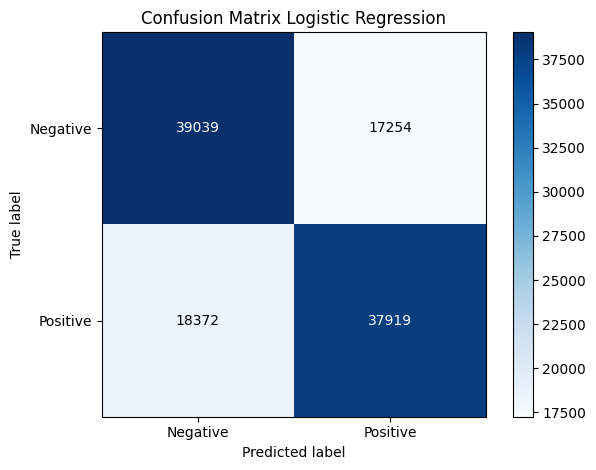

In [177]:
# Confusion Metics Logistic regression

class_labels = ['Negative', 'Positive']

fig, ax = plt.subplots()
im = ax.imshow(cm_lr, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_lr.shape[1]),
       yticks=np.arange(cm_lr.shape[0]),
       xticklabels=class_labels, yticklabels=class_labels,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix Logistic Regression')

thresh = cm_lr.max() / 2.
for i in range(cm_lr.shape[0]):
    for j in range(cm_lr.shape[1]):
        ax.text(j, i, format(cm_lr[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_lr[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


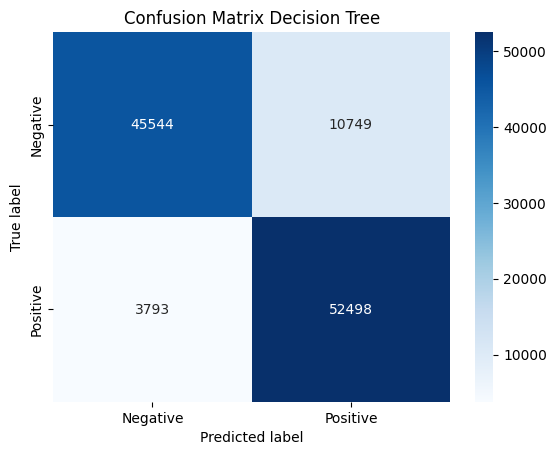

In [178]:
# Confusion Metics Decision Tree

class_labels = ['Negative', 'Positive']

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix Decision Tree')
plt.show()

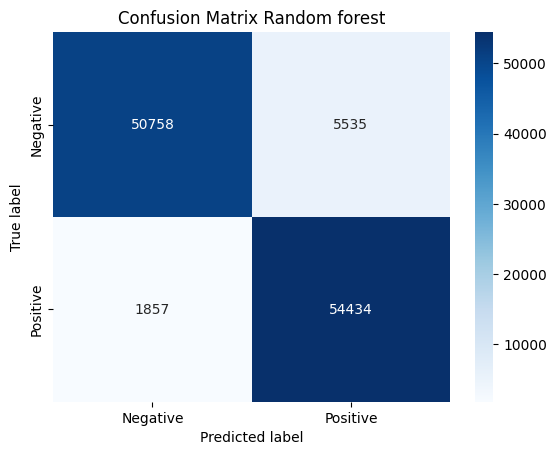

In [179]:
# Confusion Metics Random forest

class_labels = ['Negative', 'Positive']

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix Random forest')
plt.show()

## Precision and Recall Scores

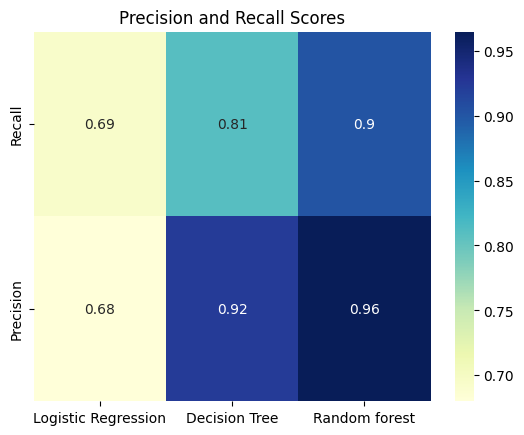

In [180]:
models = ['Logistic Regression', 'Decision Tree', 'Random forest']
recall_scores = [recall_lr, recall_dt, recall_rf]
precision_scores = [presisi_lr, presisi_dt, presisi_rf]

scores = np.array([recall_scores, precision_scores])
ax = sns.heatmap(scores, annot=True, cmap='YlGnBu', xticklabels=models, yticklabels=['Recall', 'Precision'])
ax.set_title('Precision and Recall Scores')

plt.show()

## Model Performance

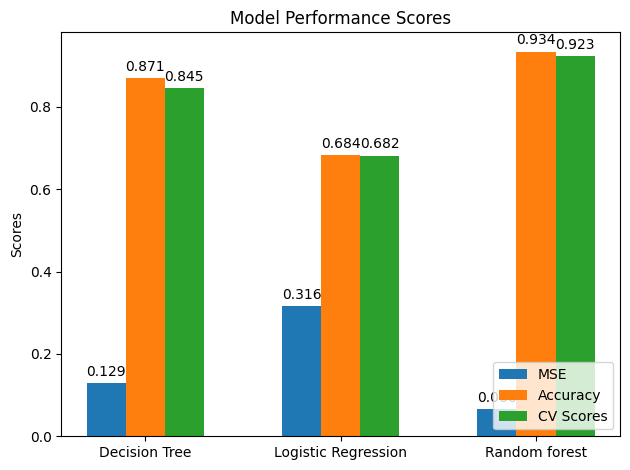

In [181]:
mse = [mse_dt, mse_lr, mse_rf]
accuracy = [accuracy_dt, accuracy_lr, accuracy_rf]
cv_scores = [cv_scores_dt.mean(), cv_scores_lr.mean(), cv_scores_rf.mean()]
labels = ['Decision Tree', 'Logistic Regression', 'Random forest']

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, mse, width, label='MSE')
rects2 = ax.bar(x, accuracy, width, label='Accuracy')
rects3 = ax.bar(x + width, cv_scores, width, label='CV Scores')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

ax.set_ylabel('Scores')
ax.set_title('Model Performance Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')
fig.tight_layout()

plt.show()

## AUC & ROC

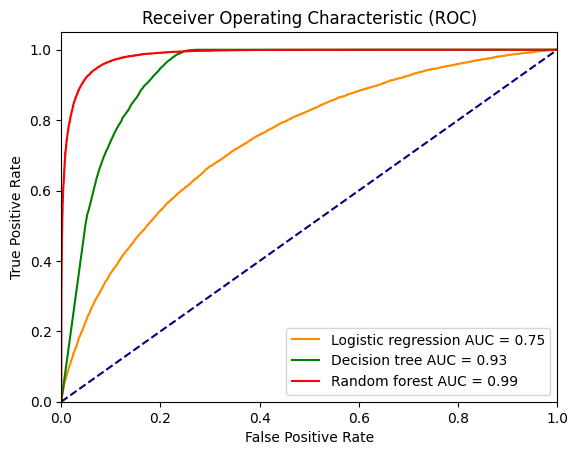

In [182]:
ypred_proba1 = lr.predict_proba(X_test)[::, 1]
ypred_proba2 = dt.predict_proba(X_test)[::, 1]
ypred_proba3 = rf.predict_proba(X_test)[::, 1]

fp1, tp1, _1 = met.roc_curve(y_test, ypred_proba1)
fp2, tp2, _2 = met.roc_curve(y_test, ypred_proba2)
fp3, tp3, _3 = met.roc_curve(y_test, ypred_proba3)

auc1 = met.roc_auc_score(y_test, ypred_proba1)
auc2 = met.roc_auc_score(y_test, ypred_proba2)
auc3 = met.roc_auc_score(y_test, ypred_proba3)

plt.plot(fp1, tp1, color='darkorange', label='Logistic regression AUC = %0.2f' % auc1)
plt.plot(fp2, tp2, color='green', label='Decision tree AUC = %0.2f'% auc2)
plt.plot(fp3, tp3, color='red', label='Random forest AUC = %0.2f' % auc3)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

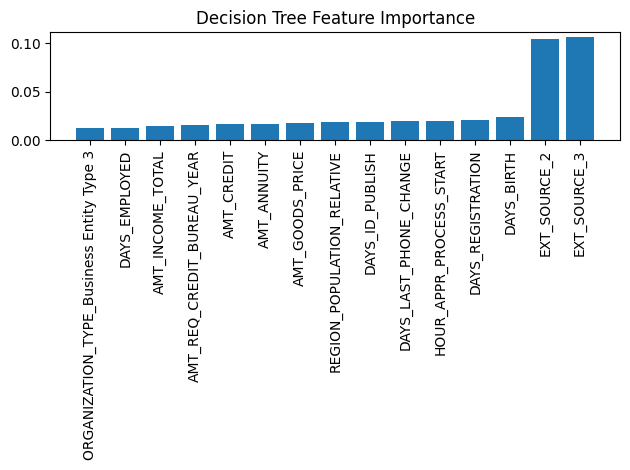

In [183]:
importances = dt.feature_importances_
features = X.columns

indices = np.argsort(importances)[165:]

plt.title("Decision Tree Feature Importance")

plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), features[indices], rotation='vertical', )

plt.tight_layout()
plt.show()

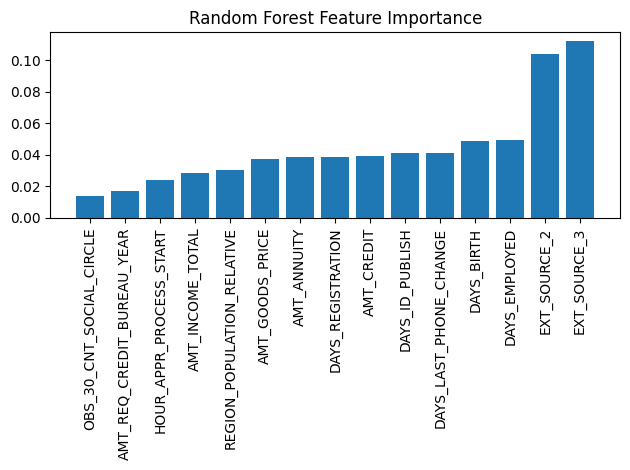

In [184]:
importances = rf.feature_importances_
indices = np.argsort(importances)[165:]
features = X.columns

plt.title("Random Forest Feature Importance")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), features[indices], rotation='vertical')
plt.tight_layout()
plt.show()


---
# Visualization

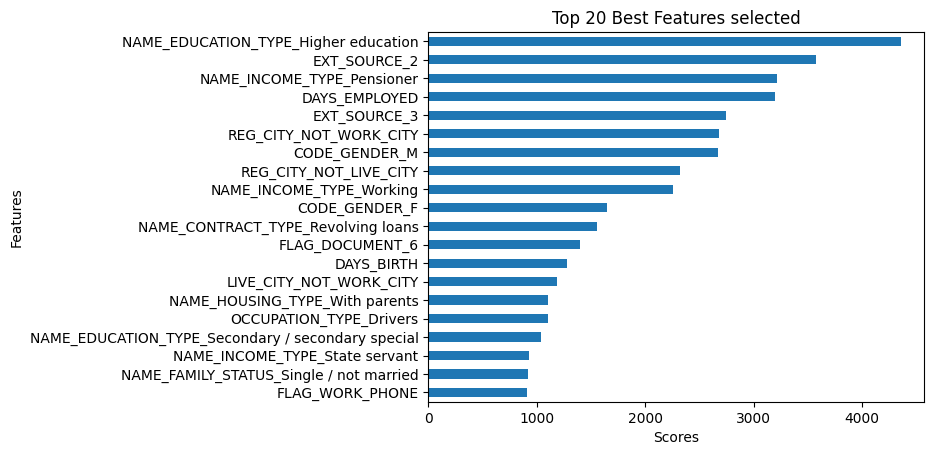

In [185]:
feature_scores = feature_scores[:20]

feature_and_score = feature_scores.groupby(['Features']).sum()['Scores'].sort_values(ascending=True)
feature_and_score.plot(kind='barh')
plt.ylabel('Features')
plt.xlabel('Scores')
plt.title('Top 20 Best Features selected')
plt.show()

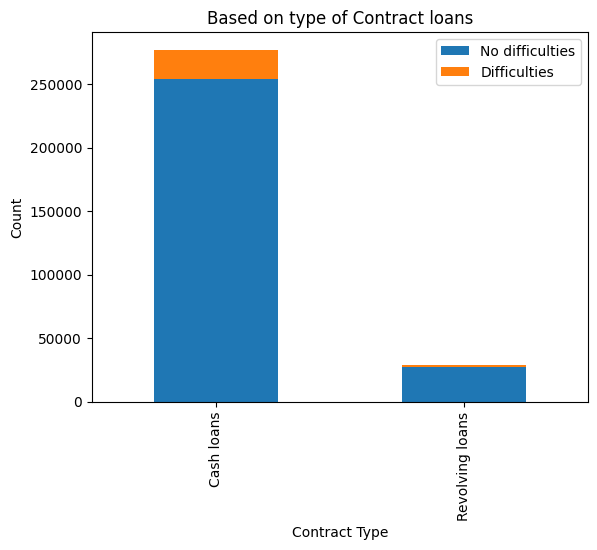

In [186]:
count_df = df_train.groupby(['NAME_CONTRACT_TYPE', 'TARGET']).size().unstack()

count_df.plot(kind='bar', stacked=True)

plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(['No difficulties', 'Difficulties'])
plt.title('Based on type of Contract loans')
plt.show()

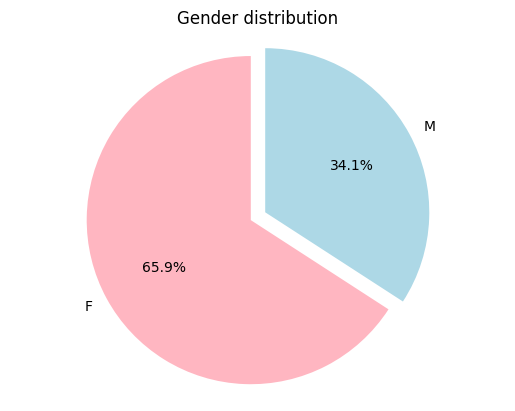

In [187]:
# Pie Chart
gender_counts = df_train['CODE_GENDER'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
colors = ['lightpink','lightblue']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Gender distribution')
plt.show()

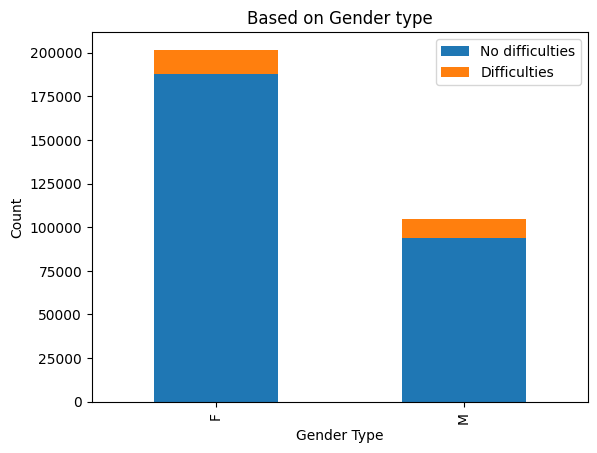

In [188]:
count_df = df_train.groupby(['CODE_GENDER', 'TARGET']).size().unstack()

count_df.plot(kind='bar', stacked=True)

plt.xlabel('Gender Type')
plt.ylabel('Count')
plt.legend(['No difficulties', 'Difficulties'])
plt.title('Based on Gender type')
plt.show()

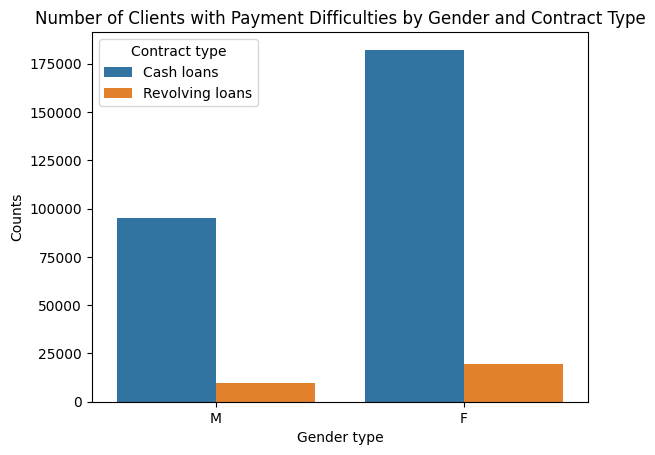

In [189]:
# Number of Clients with Payment Difficulties by Gender and Contract Type

sns.countplot(x='CODE_GENDER', hue='NAME_CONTRACT_TYPE', data=df_train, hue_order=['Cash loans', 'Revolving loans'])
plt.xlabel('Gender type')
plt.ylabel('Counts')
plt.title('Number of Clients with Payment Difficulties by Gender and Contract Type')
plt.legend(title='Contract type')
plt.show()


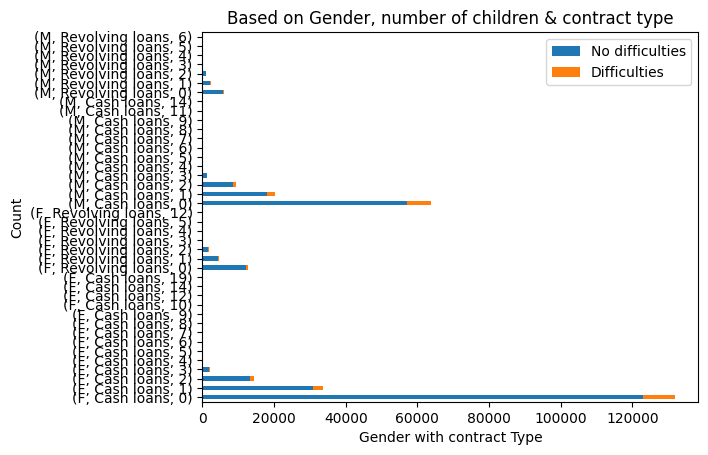

In [190]:
count_df = df_train.groupby(['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'CNT_CHILDREN', 'TARGET']).size().unstack()

count_df.plot(kind='barh', stacked=True)
plt.xlabel('Gender with contract Type')
plt.ylabel('Count')
plt.legend(['No difficulties', 'Difficulties'])
plt.title('Based on Gender, number of children & contract type')

plt.show()

Based on the data above, we can conclude that the total number of clients with payment difficulties and without payment difficulties consists primarily of women who have cash loans and no children. The total number of clients without difficulties is more than 120,000, while the number of clients with difficulties is even higher than that.

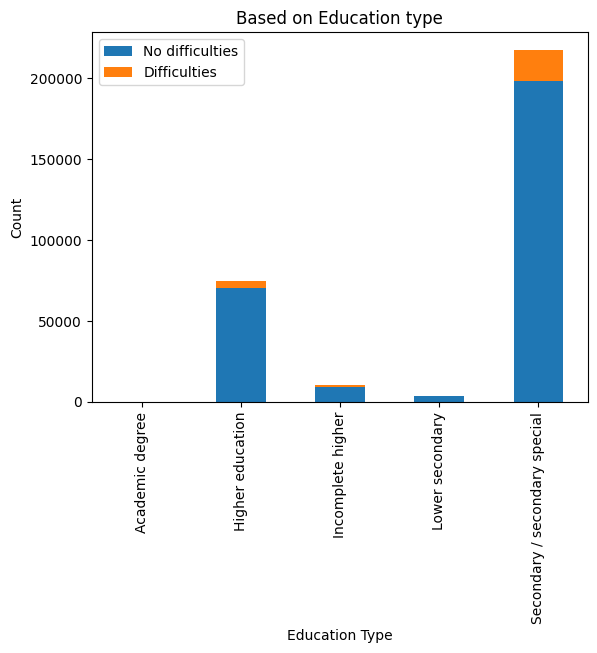

In [191]:
count_df = df_train.groupby(['NAME_EDUCATION_TYPE', 'TARGET']).size().unstack()

count_df.plot(kind='bar', stacked=True)

plt.xlabel('Education Type')
plt.ylabel('Count')
plt.legend(['No difficulties', 'Difficulties'])
plt.title('Based on Education type')
plt.show()

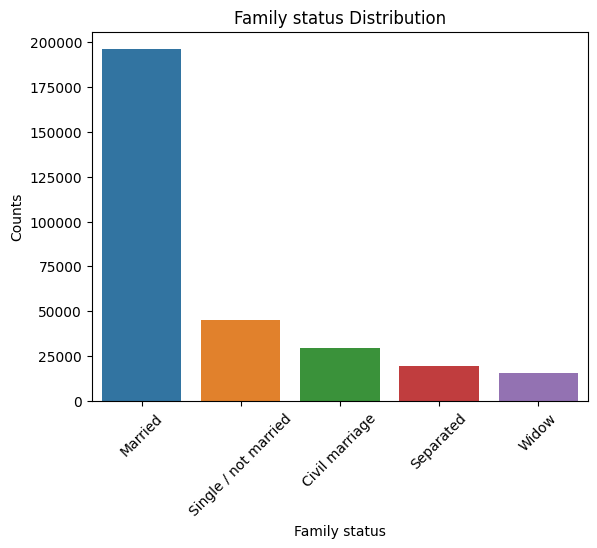

In [192]:
# Family status Distribution

status_counts = df_train['NAME_FAMILY_STATUS'].value_counts()
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.xlabel('Family status')
plt.ylabel('Counts')
plt.title('Family status Distribution')
plt.xticks(rotation=45)
plt.show()

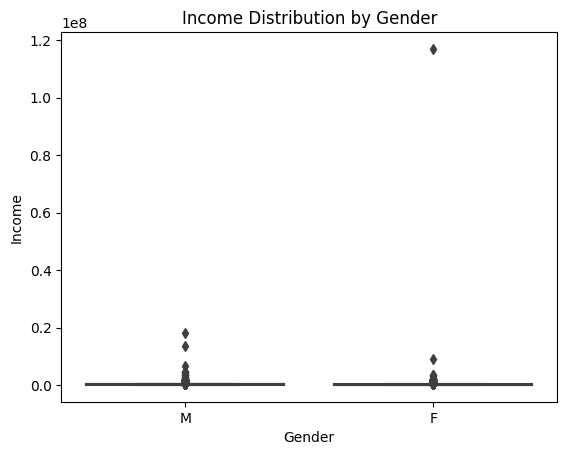

In [193]:
# Income Distribution by Gender

sns.boxplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', data=df_train)
plt.xlabel('Gender')
plt.ylabel('Income')
plt.title('Income Distribution by Gender')
plt.show()


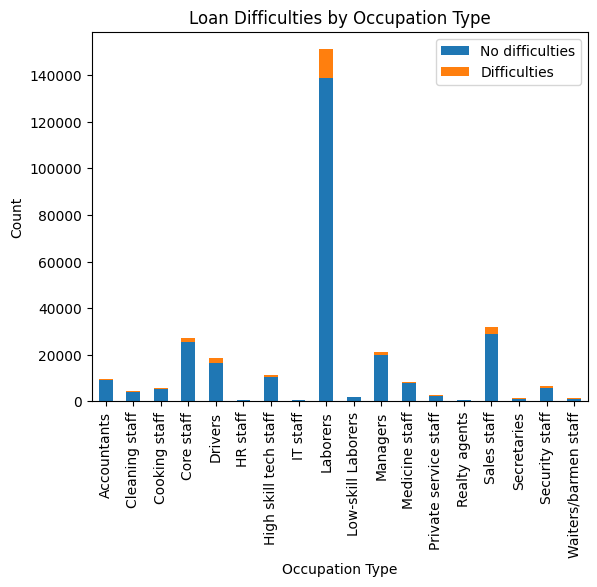

In [194]:
# Loan Difficulties by Occupation Type 

occ_counts = df_train.groupby(['OCCUPATION_TYPE','TARGET']).size().unstack()
occ_counts.plot(kind='bar', stacked=True)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.legend(['No difficulties', 'Difficulties'])
plt.title('Loan Difficulties by Occupation Type')
plt.show()


<ipython-input-195-d01851044054>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE']].corr()


<Axes: >

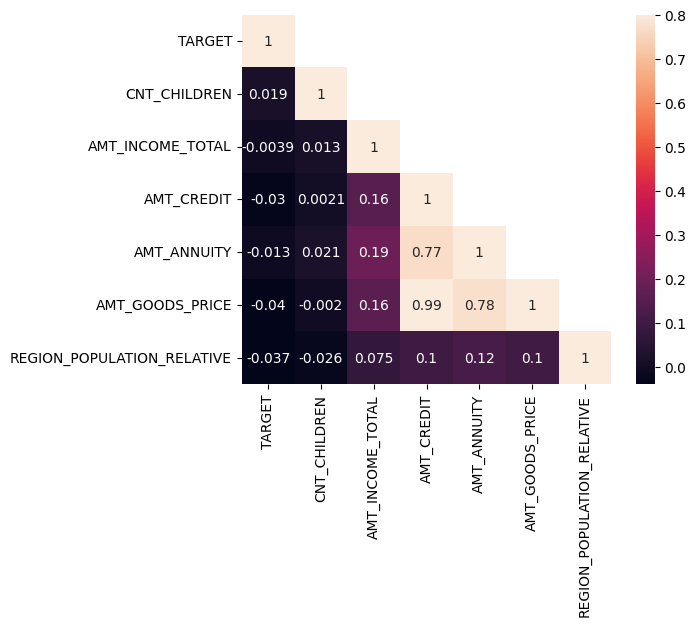

In [195]:

corrMatt = df_train[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','NAME_TYPE_SUITE',
        'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
        'NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)


<Axes: >

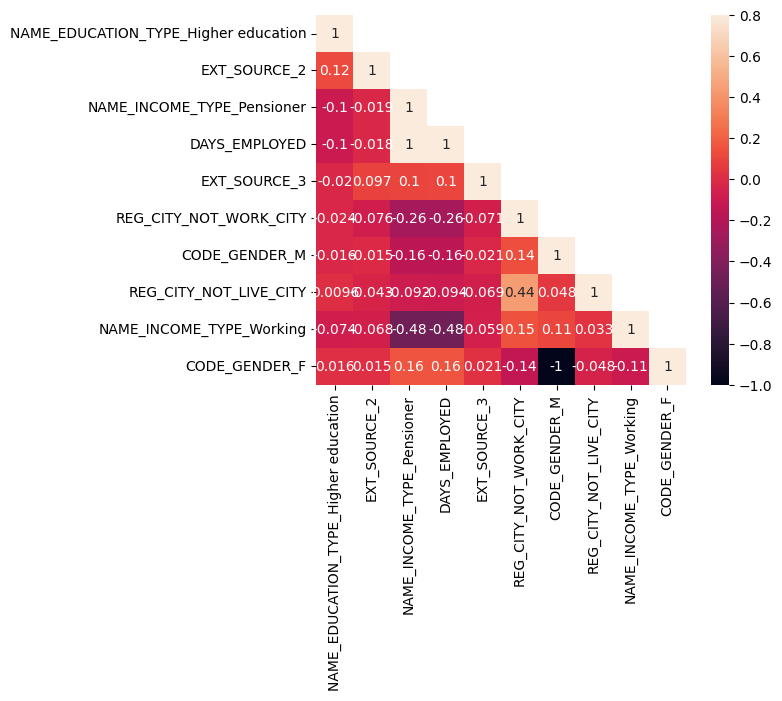

In [196]:
lis_feature_score = list(feature_scores.Features[:10].unique())
lis_feature_score

corrMatt = df_train[lis_feature_score].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)


# Data Test

In [197]:
drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/Colab Notebooks/application_test.csv'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [198]:
df_test = pd.read_csv(path)
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [199]:
df_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [200]:
print('data shape:',df_test.shape)
print('='*100)
print('data columns', df_test.columns)

data shape: (48744, 121)
data columns Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)


In [201]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [202]:
# detecting data duplication

print('number of data duplication:', df_test.duplicated().sum())

number of data duplication: 0


In [203]:
# MASTIIN LAGI APAKAH ADA NAN DI df_train atau ENGGAK

nan_values = df_test.isna().sum().values
nan_values

array([    0,     0,     0,     0,     0,     0,     0,     0,    24,
           0,   911,     0,     0,     0,     0,     0,     0,     0,
           0,     0, 32312,     0,     0,     0,     0,     0,     0,
       15605,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0, 20532,     8,  8668, 23887, 27641,
       22856, 31818, 33495, 25189, 23579, 23321, 32466, 28254, 32780,
       23552, 33347, 26084, 23887, 27641, 22856, 31818, 33495, 25189,
       23579, 23321, 32466, 28254, 32780, 23552, 33347, 26084, 23887,
       27641, 22856, 31818, 33495, 25189, 23579, 23321, 32466, 28254,
       32780, 23552, 33347, 26084, 32797, 23619, 22624, 23893, 22209,
          29,    29,    29,    29,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,  6049,  6049,
        6049,  6049,  6049,  6049])

In [204]:
# Menghitung jumlah kolom based on 45% dari values nan_values 

nan_values = list(nan_values)
rows_df_test = df_test.shape[0]

threshold = 0.45 * rows_df_test  # 50% dari 307511
count = sum(1 for value in nan_values if value > threshold)

print("Jumlah nilai kolom yang lebih besar dari 45% dari 48744:", count)
print('total threshold:',threshold)
print('='*100)


indices = [index for index, value in enumerate(nan_values) if value > threshold]
print("Indeks dengan nilai lebih besar dari 45% dari 48744:", indices)

Jumlah nilai kolom yang lebih besar dari 45% dari 48744: 48
total threshold: 21934.8
Indeks dengan nilai lebih besar dari 45% dari 48744: [20, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]


In [205]:
column_21 = df_test.columns[20]
column_left = df_test.columns[43:90] 
column_left= list(column_left)
all_remove_column = [column_21]
all_remove_column = all_remove_column + column_left

df_test.drop(df_test[all_remove_column], inplace=True, axis=1)

In [206]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing and Feature Engineering

## Object data type Columns

In [207]:
obj = df_test.dtypes
obj_counts = obj[obj == 'object'].count()
obj_columns = obj[obj == 'object'].index.tolist()

print("Jumlah kolom dengan dtype 'object':", obj_counts)
print('='* 50)
print("Kolom dengan dtype 'object':\n", obj_columns)
print('='* 50)
print('tipe data obj_columns', type(obj_columns))

Jumlah kolom dengan dtype 'object': 12
Kolom dengan dtype 'object':
 ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
tipe data obj_columns <class 'list'>


In [208]:
df_test[obj_columns].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,NaN,TUESDAY,Kindergarten
1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Low-skill Laborers,FRIDAY,Self-employed
2,Cash loans,M,Y,Y,NaN,Working,Higher education,Married,House / apartment,Drivers,MONDAY,Transport: type 3
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,FRIDAY,Business Entity Type 3


In [209]:
# mencari berapa banyak value NaN pada tipe data object

print('number of isna detection:')
isna_obj = df_test[obj_columns].isna()
isna_obj.sum()

number of isna detection:


NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_TYPE_SUITE                 911
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE               15605
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
dtype: int64

In [210]:
lis_kolom = ['NAME_TYPE_SUITE', 'OCCUPATION_TYPE',]

for i in lis_kolom:
    all_value_counts = df_train[i].value_counts()
    print('Column\'s name:', i)
    print(all_value_counts)
    print('='*60)
    print()
    

Column's name: NAME_TYPE_SUITE
Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Column's name: OCCUPATION_TYPE
Laborers                 150976
Sales staff               31958
Core staff                27426
Managers                  21276
Drivers                   18521
High skill tech staff     11327
Accountants                9769
Medicine staff             8505
Security staff             6695
Cooking staff              5930
Cleaning staff             4641
Private service staff      2637
Low-skill Laborers         2084
Waiters/barmen staff       1340
Secretaries                1301
Realty agents               748
HR staff                    559
IT staff                    522
Name: OCCUPATION_TYPE, dtype: int64



In [211]:
df_test = df_test.dropna(subset=['NAME_TYPE_SUITE'])
print('total number of NaN value in Name Type Suite column:',df_test['NAME_TYPE_SUITE'].isna().sum())


total number of NaN value in Name Type Suite column: 0


In [212]:
# df_train.OCCUPATION_TYPE.isna().sum()  HAPUS 96006
list_OCCUPATION_TYPE = ['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers',
                       'High skill tech staff']

df_test['OCCUPATION_TYPE'].fillna(random.choice(list_OCCUPATION_TYPE), inplace=True)

print('Jumlah NaN values pada kolom ini adalah:',df_test['OCCUPATION_TYPE'].isna().sum())
print('='*80)
print(df_test['OCCUPATION_TYPE'].value_counts())


Jumlah NaN values pada kolom ini adalah: 0
High skill tech staff    17101
Laborers                  8520
Sales staff               4972
Core staff                4292
Managers                  3504
Drivers                   2721
Accountants               1597
Medicine staff            1292
Security staff             900
Cooking staff              883
Cleaning staff             642
Private service staff      443
Low-skill Laborers         269
Secretaries                210
Waiters/barmen staff       175
Realty agents              134
HR staff                    99
IT staff                    79
Name: OCCUPATION_TYPE, dtype: int64


<ipython-input-212-894d570c3d59>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['OCCUPATION_TYPE'].fillna(random.choice(list_OCCUPATION_TYPE), inplace=True)


In [213]:
def objColumns_and_NaN_object():   
    obj = df_train.dtypes
    obj_columns = obj[obj == 'object'].index.tolist()

    print(obj_columns)
    print('='*60)
    print(df_train[obj_columns].isna().sum())

objColumns_and_NaN_object()

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64


In [214]:
obj = df_train.dtypes
obj_columns = obj[obj == 'object'].index.tolist()
df_train[obj_columns].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [215]:
for i in obj_columns:
    print('kolom:', i)
    obj_unique = df_test[i].unique()
    print(obj_unique)
    print('='*90)
    

kolom: NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
kolom: CODE_GENDER
['F' 'M']
kolom: FLAG_OWN_CAR
['N' 'Y']
kolom: FLAG_OWN_REALTY
['Y' 'N']
kolom: NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Group of people' 'Other_B'
 'Children' 'Other_A']
kolom: NAME_INCOME_TYPE
['Working' 'State servant' 'Pensioner' 'Commercial associate'
 'Businessman' 'Student' 'Unemployed']
kolom: NAME_EDUCATION_TYPE
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
kolom: NAME_FAMILY_STATUS
['Married' 'Single / not married' 'Civil marriage' 'Widow' 'Separated']
kolom: NAME_HOUSING_TYPE
['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
kolom: OCCUPATION_TYPE
['High skill tech staff' 'Low-skill Laborers' 'Sales staff' 'Drivers'
 'Core staff' 'Laborers' 'Managers' 'Accountants' 'Medicine staff'
 'Security staff' 'Private service staff' 'Secretaries' 'Cleaning staf

In [216]:
col_ORGANIZATION_TYPE = ['Business Entity Type 3','Self-employed','Other', 'Medicine',
                         'Business Entity Type 2','Government','School','Trade: type 7',
                         'Kindergarten', 'Construction','Business Entity Type 1',
                         'Transport: type 4','Trade: type 3', 'Industry: type 9', 'Industry: type 3',
                         'Security', 'Housing','Industry: type 11','Military','Bank']

df_test['ORGANIZATION_TYPE'] = [random.choice(col_ORGANIZATION_TYPE) if x == 'XNA' else x for x in df_test['ORGANIZATION_TYPE']] 


<ipython-input-216-cf9a08a04615>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['ORGANIZATION_TYPE'] = [random.choice(col_ORGANIZATION_TYPE) if x == 'XNA' else x for x in df_test['ORGANIZATION_TYPE']]


In [217]:
df_test.ORGANIZATION_TYPE.unique()

array(['Kindergarten', 'Self-employed', 'Business Entity Type 3',
       'Government', 'Industry: type 9', 'School', 'Trade: type 2',
       'Bank', 'Services', 'Other', 'Industry: type 3', 'Construction',
       'Trade: type 6', 'Industry: type 12', 'Trade: type 7',
       'Industry: type 11', 'Business Entity Type 1', 'Postal',
       'Medicine', 'Housing', 'Business Entity Type 2', 'Military',
       'Industry: type 4', 'Trade: type 3', 'Legal Services', 'Security',
       'University', 'Agriculture', 'Transport: type 2',
       'Transport: type 3', 'Security Ministries', 'Industry: type 7',
       'Transport: type 4', 'Telecom', 'Emergency', 'Police',
       'Industry: type 1', 'Transport: type 1', 'Electricity',
       'Industry: type 5', 'Hotel', 'Restaurant', 'Advertising', 'Mobile',
       'Trade: type 1', 'Industry: type 8', 'Realtor', 'Cleaning',
       'Industry: type 2', 'Trade: type 4', 'Industry: type 6', 'Culture',
       'Insurance', 'Religion', 'Industry: type 13', 'In

In [218]:
col = ['CODE_GENDER', 'ORGANIZATION_TYPE']

for i in col:
    val_col = df_test[i].value_counts()    
    print(val_col)
    print('='*80)

F    32058
M    15775
Name: CODE_GENDER, dtype: int64
Business Entity Type 3    11051
Self-employed              6282
Other                      3126
Medicine                   2135
Government                 1950
Business Entity Type 2     1919
Trade: type 7              1748
School                     1689
Construction               1462
Kindergarten               1459
Business Entity Type 1     1334
Transport: type 4          1328
Trade: type 3              1002
Military                    978
Industry: type 9            945
Industry: type 3            939
Security                    933
Housing                     880
Industry: type 11           870
Bank                        828
Transport: type 2           438
Police                      429
Security Ministries         335
Services                    295
Agriculture                 289
Postal                      288
Restaurant                  281
Trade: type 2               238
University                  218
Industry: type 7  

In [219]:
objColumns_and_NaN_object()
print()
print('=' *80)
print()
for i in obj_columns:
    print('kolom:', i)
    obj_unique = df_test[i].unique()
    print(obj_unique)
    print('='*90)
    

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64


kolom: NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
kolom: CODE_GENDER
['F' 'M']
kolom: FLAG_OWN_CAR
['N' 'Y']
kolom: FLAG_OWN_REALTY
['Y' 'N']
kolom: NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Group of people' 'Other_B'
 'Children' 'Other_A']
kolom: NAME_INCOME_TYPE
['Working' 'State servant' 'Pensioner' 'Commercial associate

In [220]:
df_encoded = pd.get_dummies(df_test[obj_columns])
df_encoded = df_encoded.astype('int')
df_test = pd.concat([df_test, df_encoded], axis=1)

df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0,0,0,0,0,0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0,0,0,0,0,0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0,0,0,0,0,0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0,0,0,0,0,0
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0,0,0,0,0,0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,1,0,0,0,0,0
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0,0,0,0,0,0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0,0,0,0,0,0


## int data type columns

In [221]:
intg = df_test.dtypes
intg_counts = intg[intg == 'int64'].count()
intg_columns = intg[intg == 'int64'].index.tolist()

print("Jumlah kolom dengan dtype 'int':", intg_counts)
print('='* 50)
print("Kolom dengan dtype 'int':\n", intg_columns)
print('='* 50)
print('tipe data obj_columns', type(intg_columns))

Jumlah kolom dengan dtype 'int': 160
Kolom dengan dtype 'int':
 ['SK_ID_CURR', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_O

In [222]:
df_test[intg_columns].isna().sum()

SK_ID_CURR                             0
CNT_CHILDREN                           0
DAYS_BIRTH                             0
DAYS_EMPLOYED                          0
DAYS_ID_PUBLISH                        0
                                      ..
ORGANIZATION_TYPE_Transport: type 1    0
ORGANIZATION_TYPE_Transport: type 2    0
ORGANIZATION_TYPE_Transport: type 3    0
ORGANIZATION_TYPE_Transport: type 4    0
ORGANIZATION_TYPE_University           0
Length: 160, dtype: int64

In [223]:
for i in intg_columns:
    print('kolom:', i)
    int_unique = df_test[i].unique()
    print(int_unique)
    print('='*90)


kolom: SK_ID_CURR
[100001 100005 100028 ... 456223 456224 456250]
kolom: CNT_CHILDREN
[ 0  2  1  3  8  4  6  5  7 20 11]
kolom: DAYS_BIRTH
[-19241 -18064 -13976 ... -24168  -9192 -16019]
kolom: DAYS_EMPLOYED
[-2329 -4469 -1866 ... -7435 -7172 -6551]
kolom: DAYS_ID_PUBLISH
[ -812 -1623 -4208 ... -5384 -5228 -6120]
kolom: FLAG_MOBIL
[1 0]
kolom: FLAG_EMP_PHONE
[1 0]
kolom: FLAG_WORK_PHONE
[0 1]
kolom: FLAG_CONT_MOBILE
[1 0]
kolom: FLAG_PHONE
[0 1]
kolom: FLAG_EMAIL
[1 0]
kolom: REGION_RATING_CLIENT
[2 1 3]
kolom: REGION_RATING_CLIENT_W_CITY
[ 2  1  3 -1]
kolom: HOUR_APPR_PROCESS_START
[18  9 11  5 15  7 14 17 10 12 13  8  4 19 16  3  6  2 23 20 21 22  1  0]
kolom: REG_REGION_NOT_LIVE_REGION
[0 1]
kolom: REG_REGION_NOT_WORK_REGION
[0 1]
kolom: LIVE_REGION_NOT_WORK_REGION
[0 1]
kolom: REG_CITY_NOT_LIVE_CITY
[0 1]
kolom: REG_CITY_NOT_WORK_CITY
[0 1]
kolom: LIVE_CITY_NOT_WORK_CITY
[0 1]
kolom: FLAG_DOCUMENT_2
[0]
kolom: FLAG_DOCUMENT_3
[1 0]
kolom: FLAG_DOCUMENT_4
[0 1]
kolom: FLAG_DOCUMENT_

## Float data type columns

In [224]:
float64 = df_test.dtypes
float64_counts = float64[float64 == 'float64'].count()
float64_columns = float64[float64== 'float64'].index.tolist()

print("Jumlah kolom dengan dtype 'float':", float64_counts)
print('='* 50)
print("Kolom dengan dtype 'float':\n", float64_columns)
print('='* 50)
print('tipe data obj_columns', type(float64_columns))

Jumlah kolom dengan dtype 'float': 21
Kolom dengan dtype 'float':
 ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
tipe data obj_columns <class 'list'>


In [225]:
nan_counts_float = df_test[float64_columns].isna().sum()
print(nan_counts_float)

AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      24
AMT_GOODS_PRICE                   0
REGION_POPULATION_RELATIVE        0
DAYS_REGISTRATION                 0
CNT_FAM_MEMBERS                   0
EXT_SOURCE_1                  20193
EXT_SOURCE_2                      8
EXT_SOURCE_3                   8520
OBS_30_CNT_SOCIAL_CIRCLE         29
DEF_30_CNT_SOCIAL_CIRCLE         29
OBS_60_CNT_SOCIAL_CIRCLE         29
DEF_60_CNT_SOCIAL_CIRCLE         29
DAYS_LAST_PHONE_CHANGE            0
AMT_REQ_CREDIT_BUREAU_HOUR     5958
AMT_REQ_CREDIT_BUREAU_DAY      5958
AMT_REQ_CREDIT_BUREAU_WEEK     5958
AMT_REQ_CREDIT_BUREAU_MON      5958
AMT_REQ_CREDIT_BUREAU_QRT      5958
AMT_REQ_CREDIT_BUREAU_YEAR     5958
dtype: int64


In [226]:
nan_counts = df_test[float64_columns].isna().sum()

lis_float_nan =[]
lis_column_float_nan= []

for col, count in nan_counts.items():
  lis_float_nan.append(count)
  lis_column_float_nan.append(col)

percentage = 0.3
rows_df_test = df_test.shape[0]

threshold = percentage * rows_df_test  
count = sum(1 for value in lis_float_nan if value > threshold)

print("Jumlah nilai kolom yang lebih besar dari 45% dari 307511 sebanyak:", count, ' kolom')
print(f'nilai threshold dari {percentage} adalah = {threshold}')
print('='*100)


indices = [index for index, value in enumerate(lis_float_nan) if value > threshold]
print("Indeks dengan nilai lebih besar dari 45% dari 307511:", indices)


Jumlah nilai kolom yang lebih besar dari 45% dari 307511 sebanyak: 1  kolom
nilai threshold dari 0.3 adalah = 14349.9
Indeks dengan nilai lebih besar dari 45% dari 307511: [7]


In [227]:
lis_mean_float =[]
for i in float64_columns:
    mean_res_float = df_test[i].mean()
    df_test[i].fillna(mean_res_float, inplace=True)
    lis_mean_float.append(mean_res_float)
        

In [228]:
print('Here below is some float columns:\n',float64_columns)
print('='*80)
print()

def float_and_number_of_floats():   
    float_col = df_test.dtypes
    float64_columns = float_col[float_col == 'float64'].index.tolist()
    float64_counts = float_col[float_col == 'float64'].count()

    print(float64_columns)
    print('='*80)
    print()
    print('Total of Float Column right now:', float64_counts,'\n')

    print(df_test[float64_columns].isna().sum())

float_and_number_of_floats()

Here below is some float columns:
 ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUR

In [229]:
random_float = random.choice(float64_columns)
random_float2 = random.choice(float64_columns)

print('Jumlah NaN values pada random kolom 1 float adalah:',df_test[random_float].isna().sum())
print()
print(df_test[random_float].value_counts())
print('='*80)
print('Jumlah NaN values pada random kolom 2 float adalah:',df_test[random_float2].isna().sum())
print()
print(df_test[random_float2].value_counts())

Jumlah NaN values pada random kolom 1 float adalah: 0

0.000000    41805
0.001839     5958
1.000000       63
2.000000        7
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
Jumlah NaN values pada random kolom 2 float adalah: 0

0.000000    41523
0.009433     5958
1.000000      322
2.000000       23
3.000000        4
6.000000        1
4.000000        1
5.000000        1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64


In [230]:
for i in float64_columns:
    print('Column name:', i)
    float_unique = df_test[i].unique()
    print(float_unique)
    print('='*90)
    

Column name: AMT_INCOME_TOTAL
[ 135000.     99000.    315000.    180000.    270000.    166500.
  162000.     67500.    247500.     90000.    202500.    225000.
  175500.    157500.    337500.     76500.    112500.    360000.
  102150.    171000.    121500.    405000.    211500.    229500.
  144000.     40500.     92250.    279000.     87750.    126000.
   45000.    252000.    495000.    189000.     81000.    193500.
   63000.     94500.    292500.    198000.    216000.    540000.
  450000.    103500.    206100.    153747.    117000.     58500.
  234000.    675000.    261000.     72000.    382500.    148500.
  301500.     54000.     56700.    108000.    288000.     85500.
  153000.    387000.     57150.    207000.    254700.     36000.
   47250.    187398.    130500.    306000.    139500.     74250.
  607500.    265500.    256500.   1350000.    220500.    432000.
  101250.    274500.    378000.    324000.     78750.    297000.
  217350.     51750.     97920.    441000.    161550.    168

In [231]:
nan_values = df_test.isna().sum().values
nan_values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Machine learning test 

In [232]:
# Convert all negative to positive values

df_test.iloc[:, 16:20] = df_test.iloc[:, 16:20].abs()
df_test['DAYS_LAST_PHONE_CHANGE'] = df_test['DAYS_LAST_PHONE_CHANGE'].abs()

In [233]:
df_col = df_test.columns
df_col = list(df_col)

col_remove = obj_columns+ ['SK_ID_CURR'] 

for x in col_remove:
    while x in df_col:
        df_col.remove(x)

In [234]:
df_test[df_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47833 entries, 0 to 48743
Columns: 180 entries, CNT_CHILDREN to ORGANIZATION_TYPE_University
dtypes: float64(21), int64(159)
memory usage: 66.1 MB


In [235]:
X2 = df_test[df_col]

In [236]:
ypred = dt.predict(X2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [237]:
df_test['TARGET'] = ypred

In [238]:
target_pred = list(df_test.TARGET[:1000])

for i in target_pred:
  print(i, end=', ')


0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0

In [239]:
target_pred2 = list(df_train.TARGET[:1000])

for i in target_pred2:
  print(i, end=', ')

1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [240]:
# TEST ACCURACY

lis1 = target_pred # data TEST
lis2 = target_pred2 # data TRAIN

correct_predictions = sum(1 for x, y in zip(lis1, lis2) if x == y)
accuracy = correct_predictions / len(lis1) * 100

print("Jumlah prediksi yang benar:", correct_predictions)
print("Akurasi prediksi:", accuracy, "%")

# DECISION TREE PREDICT = 74.7%
# LOGISTIC REGRESSION = 63.9%
# RANDOM FOREST = 93%

Jumlah prediksi yang benar: 757
Akurasi prediksi: 75.7 %
